# Neighborhood Based Collaborative Filtering Recommendation System Example:
## Here's an Example implementation in python3  of a Neighborhood Based Collaborative Filtering system. 
## The dataset can be downloaded here: https://www.kaggle.com/CooperUnion/anime-recommendations-database 

## We are predicting the best recommendations for around 7 million users. Get ready for some big data. 

### If you have any questions, feel free to email me at trackait@oberlin.edu

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import scipy as sp
import sklearn.preprocessing as pp
import matplotlib.pyplot as plt

Importing above, we need to clean the data set. Our first goal is to set up a User-Item matrix, so we can use the algorithm described in the article above. Here's the pseudocode for what we are looking at implementing:
1. Set up a user/item matrix, where the rows are the users and the columns are the items.  This is a sparse matrix, with many missing entries.
2. Define the mean user ratings for every user.
3. Mean Center user Ratings
4. Compute the similarity value between the rows(users)
5. Store the top-k similar users to users u who have specified ratings for item i.
6. With the similarity function, the neighborhoods you predict the missing ratings by: adding the mean value to  (the sum of the similarity of the user times the mean centered value divided by the sum of the absolute value of the similarity value of every user in neighborhood. 
7. Predict ratings

So lets load the dataset and get to work:

In [2]:
anime = pd.read_csv('./datasets/anime.csv')
rating = pd.read_csv('./datasets/rating.csv')


In [3]:
print('anime shape: ',anime.shape) 
print('raings shape: ',rating.shape) 

print('thats a lot of items: Lets reduce this as we have a lot of users: roughly, 7.8 million.')


anime shape:  (12294, 7)
raings shape:  (7813737, 3)
thats a lot of items: Lets reduce this as we have a lot of users: roughly, 7.8 million.


In [4]:
print(anime[anime['type']=="TV"].shape) 
animeTV = anime[anime['type']=="TV"]
animeTV  = animeTV.drop(['genre','type','episodes','members'], axis=1)
(animeTV.notnull()==False).sum() # no nans now

(3787, 7)


anime_id      0
name          0
rating      116
dtype: int64

With one dataframe cleaned and ready to be used, lets look at the ratings matrix.

In [5]:
print('unique users: ', len(rating.user_id.unique()))
print('unique anime: ', len(rating.anime_id.unique()))# this is a problem, as we only want TV anime. We'll have to sort this out, with merge.
#lets sample 100k users to easy computation
rating = rating.sample(10000)
ratingDF = pd.merge(animeTV,rating, on=['anime_id','anime_id'])
ratingDF.shape

unique users:  73515
unique anime:  11200


(6785, 5)

In [6]:
print('matching anime got sorted out: ',len(ratingDF['name'].unique()))

print('NAN size: user: ',(ratingDF.user_id.notnull()==False).sum(), 'titles: ',(ratingDF.anime_id.notnull()==False).sum()
     )
print('now we have to assemble the ratings matrix, with user ratings as rows and movies as columns')
print('to remove memory error, lets just sample 100k rows')
ratingDF.rating_y.replace({-1:np.nan},regex=True,inplace=True)
ratingMatrix = ratingDF.pivot_table(values='rating_y',index='user_id',columns='anime_id')
ratingMatrix

matching anime got sorted out:  1420
NAN size: user:  0 titles:  0
now we have to assemble the ratings matrix, with user ratings as rows and movies as columns
to remove memory error, lets just sample 100k rows


anime_id,1,6,7,8,15,16,17,18,19,20,...,32681,32696,32729,32828,32935,32947,32998,33028,33222,33421
user_id,,,,,,,,,,,,,,,,,,,,,
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We now have our ratings matrix. Its quite sparse. From this, we can get two really useful pieces of information besides from what we already have-- the mean rating for each user, and the L2 score for each user. 

In [7]:
#ratingMatrix['mean']
#means = ratingMatrix.mean(axis=1)# we cant calculate L2 if mean is a column, so we save it to a temporary series

#ratingMatrix['L2'] = ratingMatrix.apply(lambda x : np.sqrt(np.sum(np.power(x,2))),axis=1)
#ratingMatrix['mean']=mean
#ratingMatrix['L2']


In [8]:
#sanity check
#lets get rid of the nans now. 
ratingMatrix.fillna(0,inplace=True)


In [9]:
# now we normalize it with l2
    
meanCenteredRatingMatrix = pp.normalize(sp.sparse.coo_matrix(ratingMatrix.to_numpy()).tocsr())

In [10]:
#lets see how affected our matrix is:
#meanCenteredRatingMatrix = meanCenteredRatingMatrix.T
#meanCenteredRatingMatrix = meanCenteredRatingMatrix.loc[:, (meanCenteredRatingMatrix != 0).any(axis=0)]
#Optional: save as csv so you dont have to rerun the ENTIRE kernel.
#meanCenteredRatingMatrix.to_csv('animeMatrix.csv')


With our user Matrix mean centered, now lets find the cosine similiarity for each item. To do this, we have to convert to a scipy sparse matrix format, so we can take advantage of its sparse matrix computation speed ups (and plotting shortcuts on matplotlib).

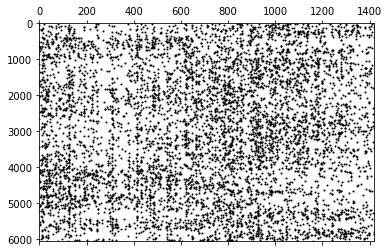

In [11]:
#meanCenteredRatingMatrix = pd.read_csv('animeMatrix.csv')
plt.spy(meanCenteredRatingMatrix,precision=0.01, marker='o', markersize=1,aspect='auto',markeredgecolor='black',rasterized=True)


That sparse matrix is not as bad as it usually has to be! Sampling and Mean centering does wonders. Lets compute the cosine similarity.

In [12]:
itemSimilarityMatrix = cosine_similarity(meanCenteredRatingMatrix.T,dense_output=True)
userSimilarityMatrix = cosine_similarity(meanCenteredRatingMatrix,dense_output=True)


The Easiest thing to do now is to get the similarity matricies into pandas dataframes so we can create a prediction function. Now we have item-item correlations, and user-user correlations. We can recommend items to a specific user, and an anime playing website can look at the similiarity of users. 

In [13]:
#print(userSimilarityMatrix.shape,ratingMatrix.columns.shape)


itemSimilarityDF= pd.DataFrame(itemSimilarityMatrix,index=ratingMatrix.columns, columns=ratingMatrix.columns) 
userSimilarityDF=pd.DataFrame(userSimilarityMatrix,index=ratingMatrix.index,columns=ratingMatrix.index)

In [14]:
def animeID_to_name(animeID): # quick function to get from anime to name
    return (animeTV[animeTV['anime_id']==animeID].name).values[0]

animeID_to_name(itemSimilarityDF.index[9])
itemSimilarityMatrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

From here, you can get the top users and top movies. But first, lets look at our prediction error. For this, we have to make a prediction function.
to make a prediction, we are going to create a peer group for every user that contains the set of similiar users to the user we are predicting who have also rated the item the user has predicted. With this peer group, we can develop "neighborhood based collaborative filtering".

In [15]:

user_id=userSimilarityDF.index[20:25]        
usersRatedItems=ratingMatrix.loc[user_id,:]
#usersRatedItems = usersRatedItems.sort_values(by=usersRatedItems.columns.values,ascending=False).index[1:]
usersRatedItems = usersRatedItems[usersRatedItems.apply(lambda x: x > 0)]
usersRatedItems.dropna(axis=1,inplace=True,how='all')
usersRatedItems.dropna(axis=0,inplace=True,how='all')
meanUser = usersRatedItems.mean(axis=1,skipna=True)
usersRatedItems.fillna(0,inplace=True)
pd.Series(np.subtract(usersRatedItems.T.sum() , meanUser)).index.values


array([226, 228, 230])

In [17]:
#def recitems(user_id, topk): #find the top k best prediction for what the user wants given the user's similiarly related users:


#predict()   


In [21]:
def findPeerUsers(user_id,anime_id,topk=50,debug=False):# remember user ids are the columns.
    if debug==True:
        user_id=userSimilarityDF.index[20]
    usersRatedItems=ratingMatrix.loc[user_id,:]
    usersRatedItems = usersRatedItems[usersRatedItems>0].index
    if debug==True:
        anime_id=usersRatedItems[0]
            # we find the closest 50 users
    closestUsers =  userSimilarityDF.sort_values(by=user_id,ascending=False).index[1:]#we cut out 0 since its always going to be the user
    peerGroup=pd.DataFrame(columns=usersRatedItems)
    for peer in closestUsers:
        
        peersRatings = ratingMatrix.loc[peer,usersRatedItems]
        peersItems = peersRatings[peersRatings>0].index
        if len(peersItems) > 0:
            x=pd.DataFrame(peersRatings,peersItems).T
            peerGroup = pd.concat([peerGroup,x],axis=0)
    peerGroup.fillna(0,inplace=True)
    peerGroup.index.name='peer_id'
    return peerGroup

def findReviewersOfItem(anime_id,debug=False):#returns a vector of all of the users who have rated an anime:
    if debug==True:
        anime_id=itemSimilarityDF.index[20]
    itemReviews = ratingMatrix.loc[:,anime_id]
    itemReviews = itemReviews[itemReviews>0]
    return itemReviews

def peerSim(user_id,peerGroup,debug=False):
    if debug==True:
        user_id=userSimilarityDF.index[20]
   # peerID = peerGroup.index
    sim=userSimilarityDF.loc[user_id,peerGroup]
    return sim
def meanCenteredRatingPerUser(user_id,debug=False):# returns vector of actual ratings- mean ratings for each item that the user rated.
    if debug==True:
     user_id=userSimilarityDF.index[20:25]        
    usersRatedItems=ratingMatrix.loc[user_id,:]
    #usersRatedItems = usersRatedItems.sort_values(by=usersRatedItems.columns.values,ascending=False).index[1:]
    usersRatedItems = usersRatedItems[usersRatedItems.apply(lambda x: x > 0)]
    usersRatedItems.dropna(axis=1,inplace=True,how='all')
    usersRatedItems.dropna(axis=0,inplace=True,how='all')
    meanUser = usersRatedItems.mean(axis=1,skipna=True)
    usersRatedItems.fillna(0,inplace=True)
    return np.subtract(usersRatedItems.T.sum() , meanUser)
        
def predict(user_id,anime_id,debug=False):
    if debug==True:
        user_id=userSimilarityDF.index[20]
    peerUsers = findReviewersOfItem(anime_id).index.values
    
    meanPeerRatings = meanCenteredRatingPerUser(peerUsers)
    meanPeerRatings = meanPeerRatings[meanPeerRatings>0]
    sim = peerSim(user_id,pd.Series(meanPeerRatings).index.values)
    denom= np.sum(np.abs(sim))
    if denom < 0.0001:
        denom+=1
    userMean =ratingMatrix.loc[user_id,:].mean()
    #print(denom)
    return np.add(userMean,np.sum(np.dot(sim,meanPeerRatings)) /denom)
    


In [22]:
x=ratingMatrix.index[33]
items=ratingMatrix.loc[x,:]
actual = items[np.isnan(items) == False]
d = predict(x,actual.index[0])

print('actual:\n ',actual.values[0])
print(d)
#list(filter(np.isnan(items),items))

actual:
  0.0
0.004929577464788733


## Excellent! Now we can look at how to calculate error lost to judge our accuracy

In [89]:
def evaluate(user_id):
    usersRatedItems=ratingMatrix.iloc[user_id,:]
    watchedAnime = usersRatedItems[usersRatedItems>0].index
    #print(watchedAnime)
    error = []
    if watchedAnime.shape[0]==0: 
         error.append(np.nan)
    for i in watchedAnime:
        actual = ratingMatrix.loc[user_id,i]
        if np.isnan(actual):
            #print(er)
            continue
            
        elif not np.isnan(actual):
            predicted = predict(user_id,i)
            if np.isnan(predicted):
                continue
            else:
                er = np.power(np.subtract(actual,predicted),2) 
                error.append(er)
    
            #print(er)
    return np.mean(error)

In [90]:

z=ratingMatrix.iloc[4,:]
z = z[z>0]
evaluate(0)

nan

In [91]:
x=ratingMatrix.index[1:100]
error = []
for i in x:
    error.append(evaluate(i))
error

[1.2398333663955564e-05,
 3.1739734179726246e-05,
 3.1739734179726246e-05,
 4.959333465582226e-05,
 4.017060107121603e-05,
 4.959333465582226e-07,
 nan,
 4.959333465582226e-05,
 nan,
 4.017060107121603e-05,
 2.430073398135291e-05,
 nan,
 nan,
 4.017060107121603e-05,
 2.430073398135291e-05,
 1.7853600476096008e-05,
 1.7853600476096008e-05,
 0.00014332473715532632,
 3.1739734179726246e-05,
 4.959333465582226e-07,
 2.430073398135291e-05,
 3.1739734179726246e-05,
 3.1739734179726246e-05,
 4.959333465582226e-07,
 2.430073398135291e-05,
 2.430073398135291e-05,
 nan,
 3.1739734179726246e-05,
 2.430073398135291e-05,
 nan,
 4.959333465582226e-07,
 0.00012695893671890498,
 nan,
 4.959333465582226e-05,
 4.017060107121603e-05,
 4.959333465582226e-07,
 3.1739734179726246e-05,
 2.430073398135291e-05,
 1.7853600476096008e-05,
 2.430073398135291e-05,
 1.2398333663955564e-05,
 3.1739734179726246e-05,
 4.017060107121603e-05,
 3.1739734179726246e-05,
 2.430073398135291e-05,
 2.430073398135291e-05,
 1.785

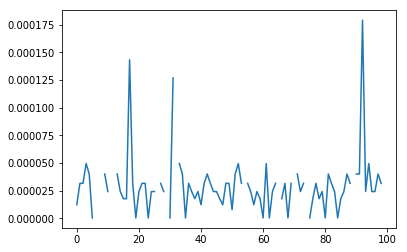

In [92]:
plt.plot(range((99)),error)

### It looks like all of our error is under 1. perfect! 
# What if we decided to use this to optimize a regression model?


In [97]:
error=np.array(error)
error=error[~np.isnan(error)]
error.max()

0.00017903193810751833